In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

<ipython-input-2-d9553bc0e9df>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


load the dataset

In [35]:
df=pd.read_csv('/content/penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

In [6]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [9]:
df.loc[detect_outliers(df,["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


There is no outlier values in the *dataset*





Missing Values

In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Finding missing values

In [11]:
df.columns[df.isnull().any()]

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [36]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [37]:

df.drop(df[df['body_mass_g'].isnull()].index,axis=0, inplace=True)


In [39]:
df['sex'] = df['sex'].fillna('MALE')

In [41]:
df.drop(df[df['sex']=='.'].index, inplace=True)

There is 2 missing values in culmen_length_mm column, 2 missing values culmen_depth_mm column, 2 missing values in flipper_length_mm column, 2 missing values in body_mass_g column and 10 missing values in sex column.

In [ ]:
df[df["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
df[df["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [42]:
df[df["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex



**Visualization**

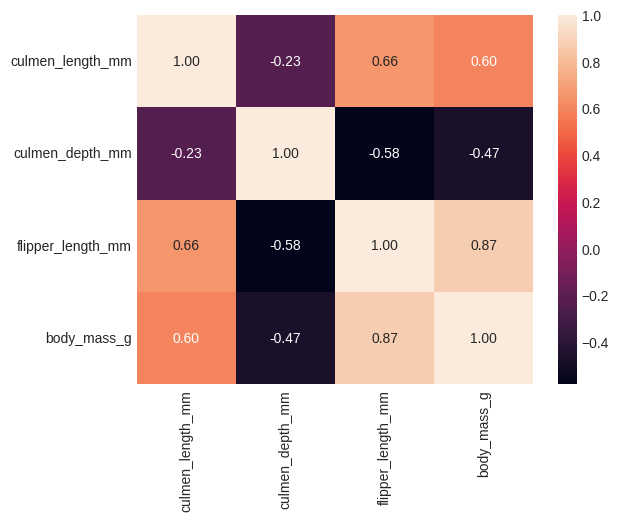

In [17]:
list1 = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.heatmap(df[list1].corr(),annot = True, fmt = ".2f")
plt.show()

In [18]:
sns.set_theme()
sns.set(rc = {"figure.dpi" : 300})
sns.set(rc = {"figure.figsize": (6,3)})

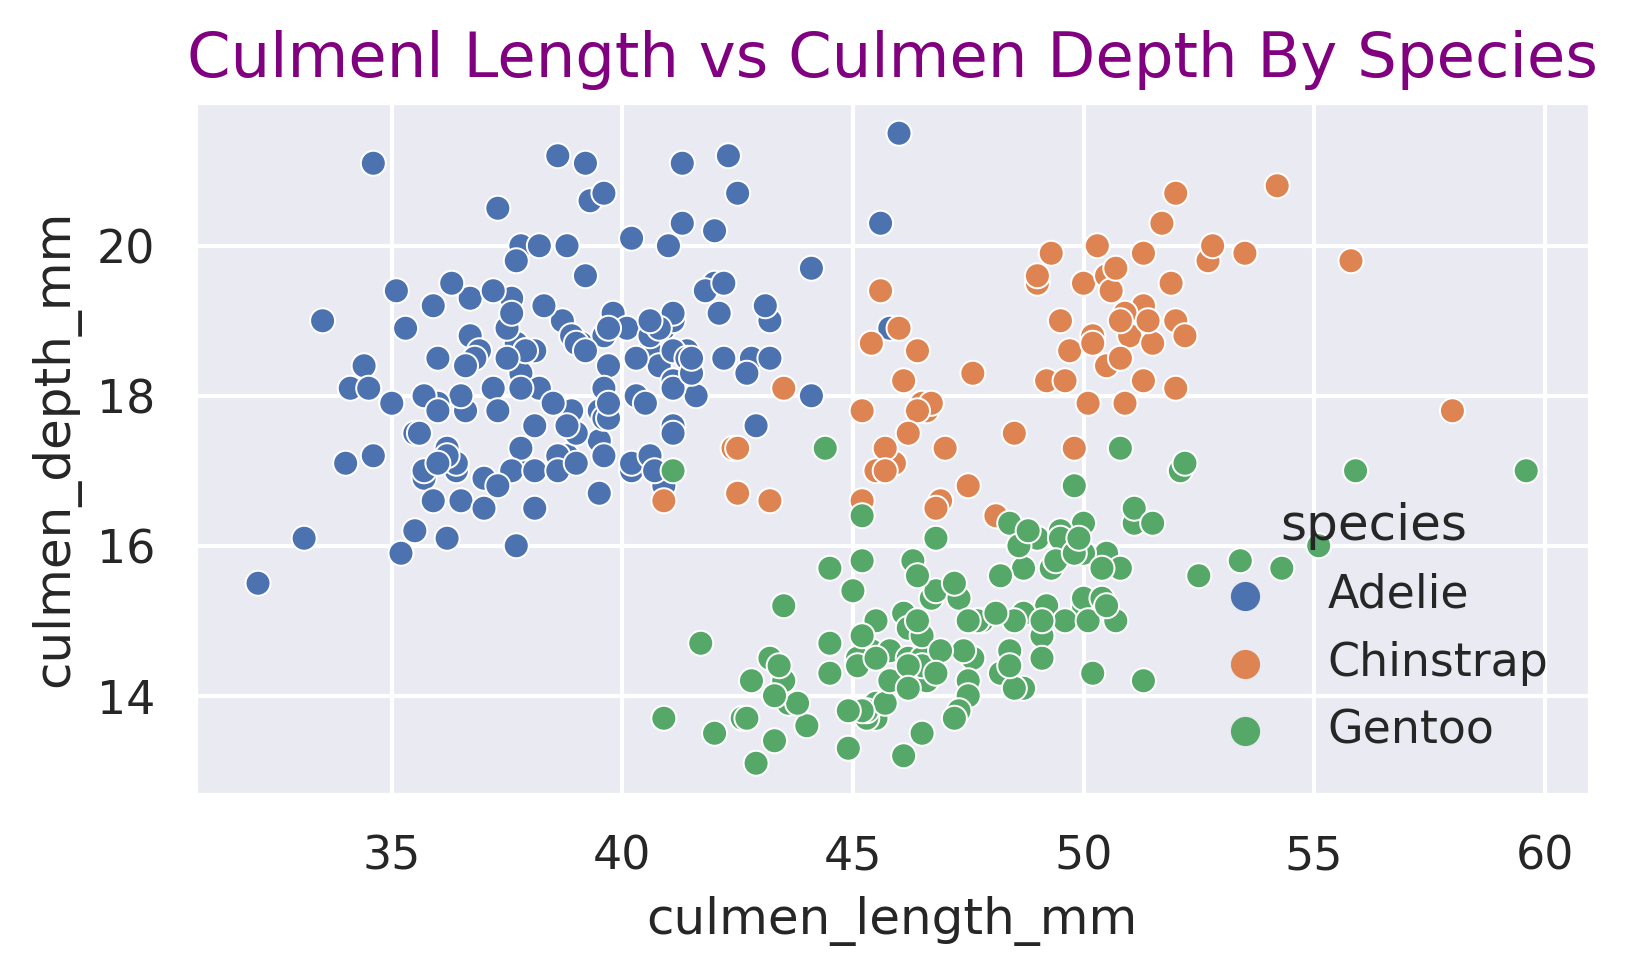

In [19]:
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = df, hue = "species")
plt.title("Culmenl Length vs Culmen Depth By Species", size=15, color="purple")
plt.show()

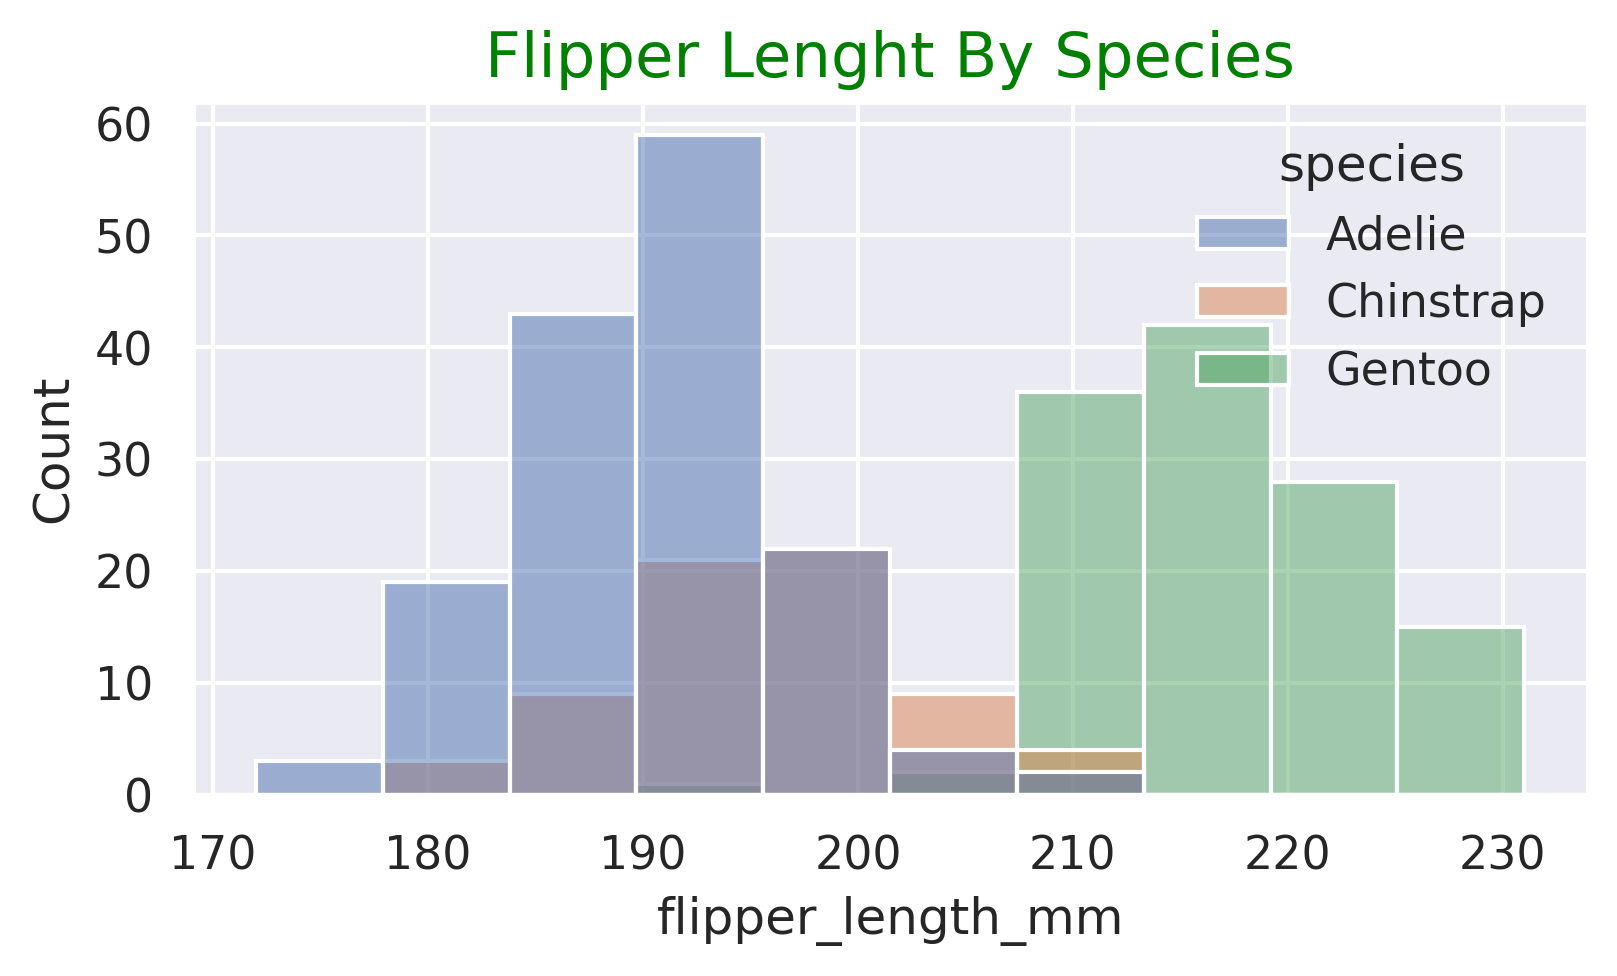

In [20]:
sns.histplot(x = "flipper_length_mm", data = df, hue = "species")
plt.title("Flipper Lenght By Species", size=15, color="green")
plt.show()

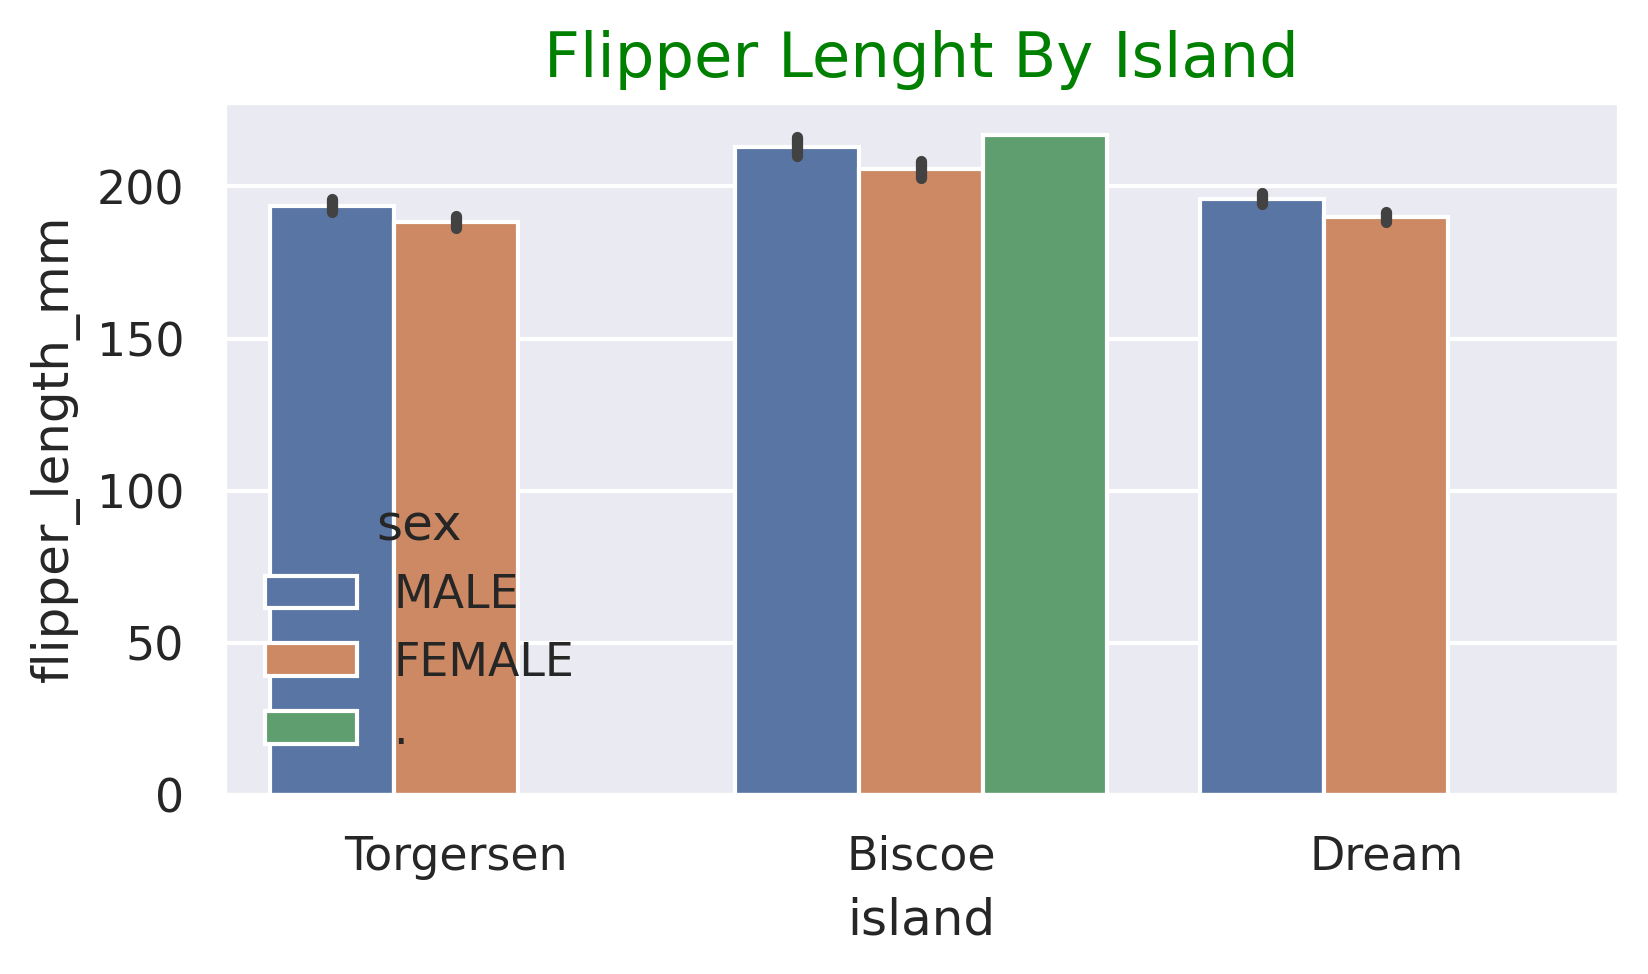

In [21]:
sns.barplot(x = "island", y = "flipper_length_mm", data = df, hue = "sex")
plt.title("Flipper Lenght By Island", size=15, color="green")
plt.show()

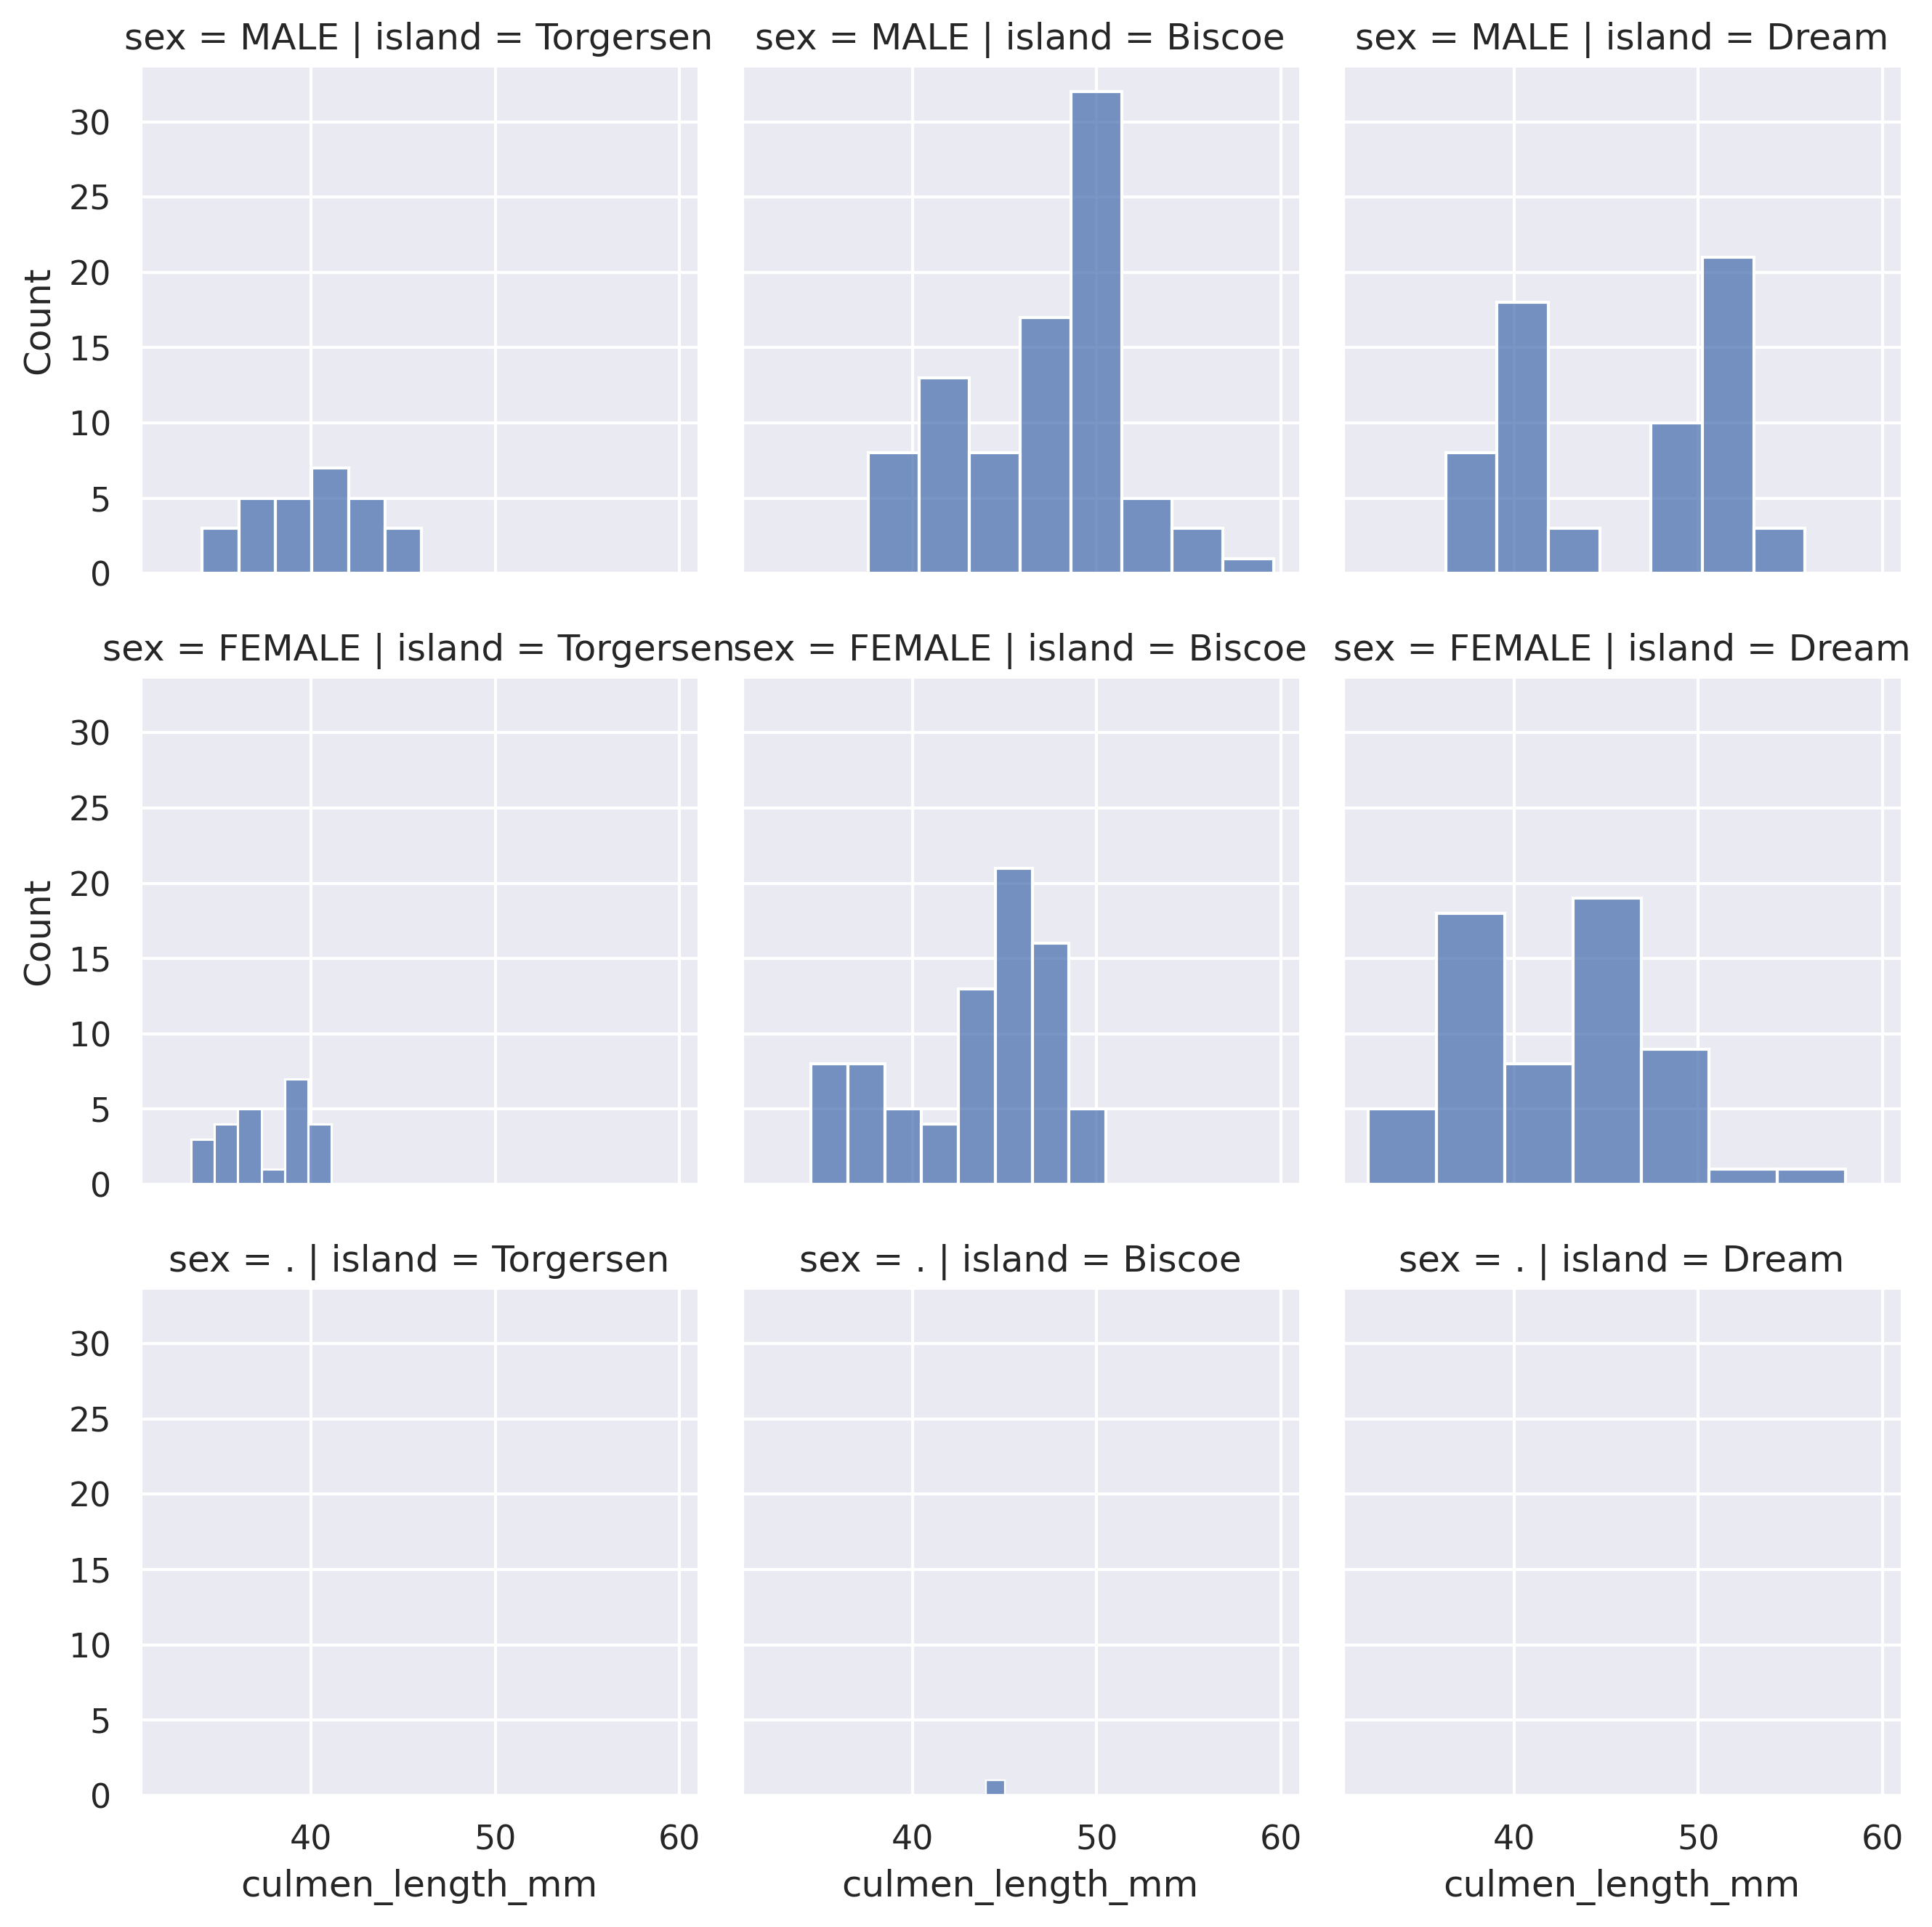

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()


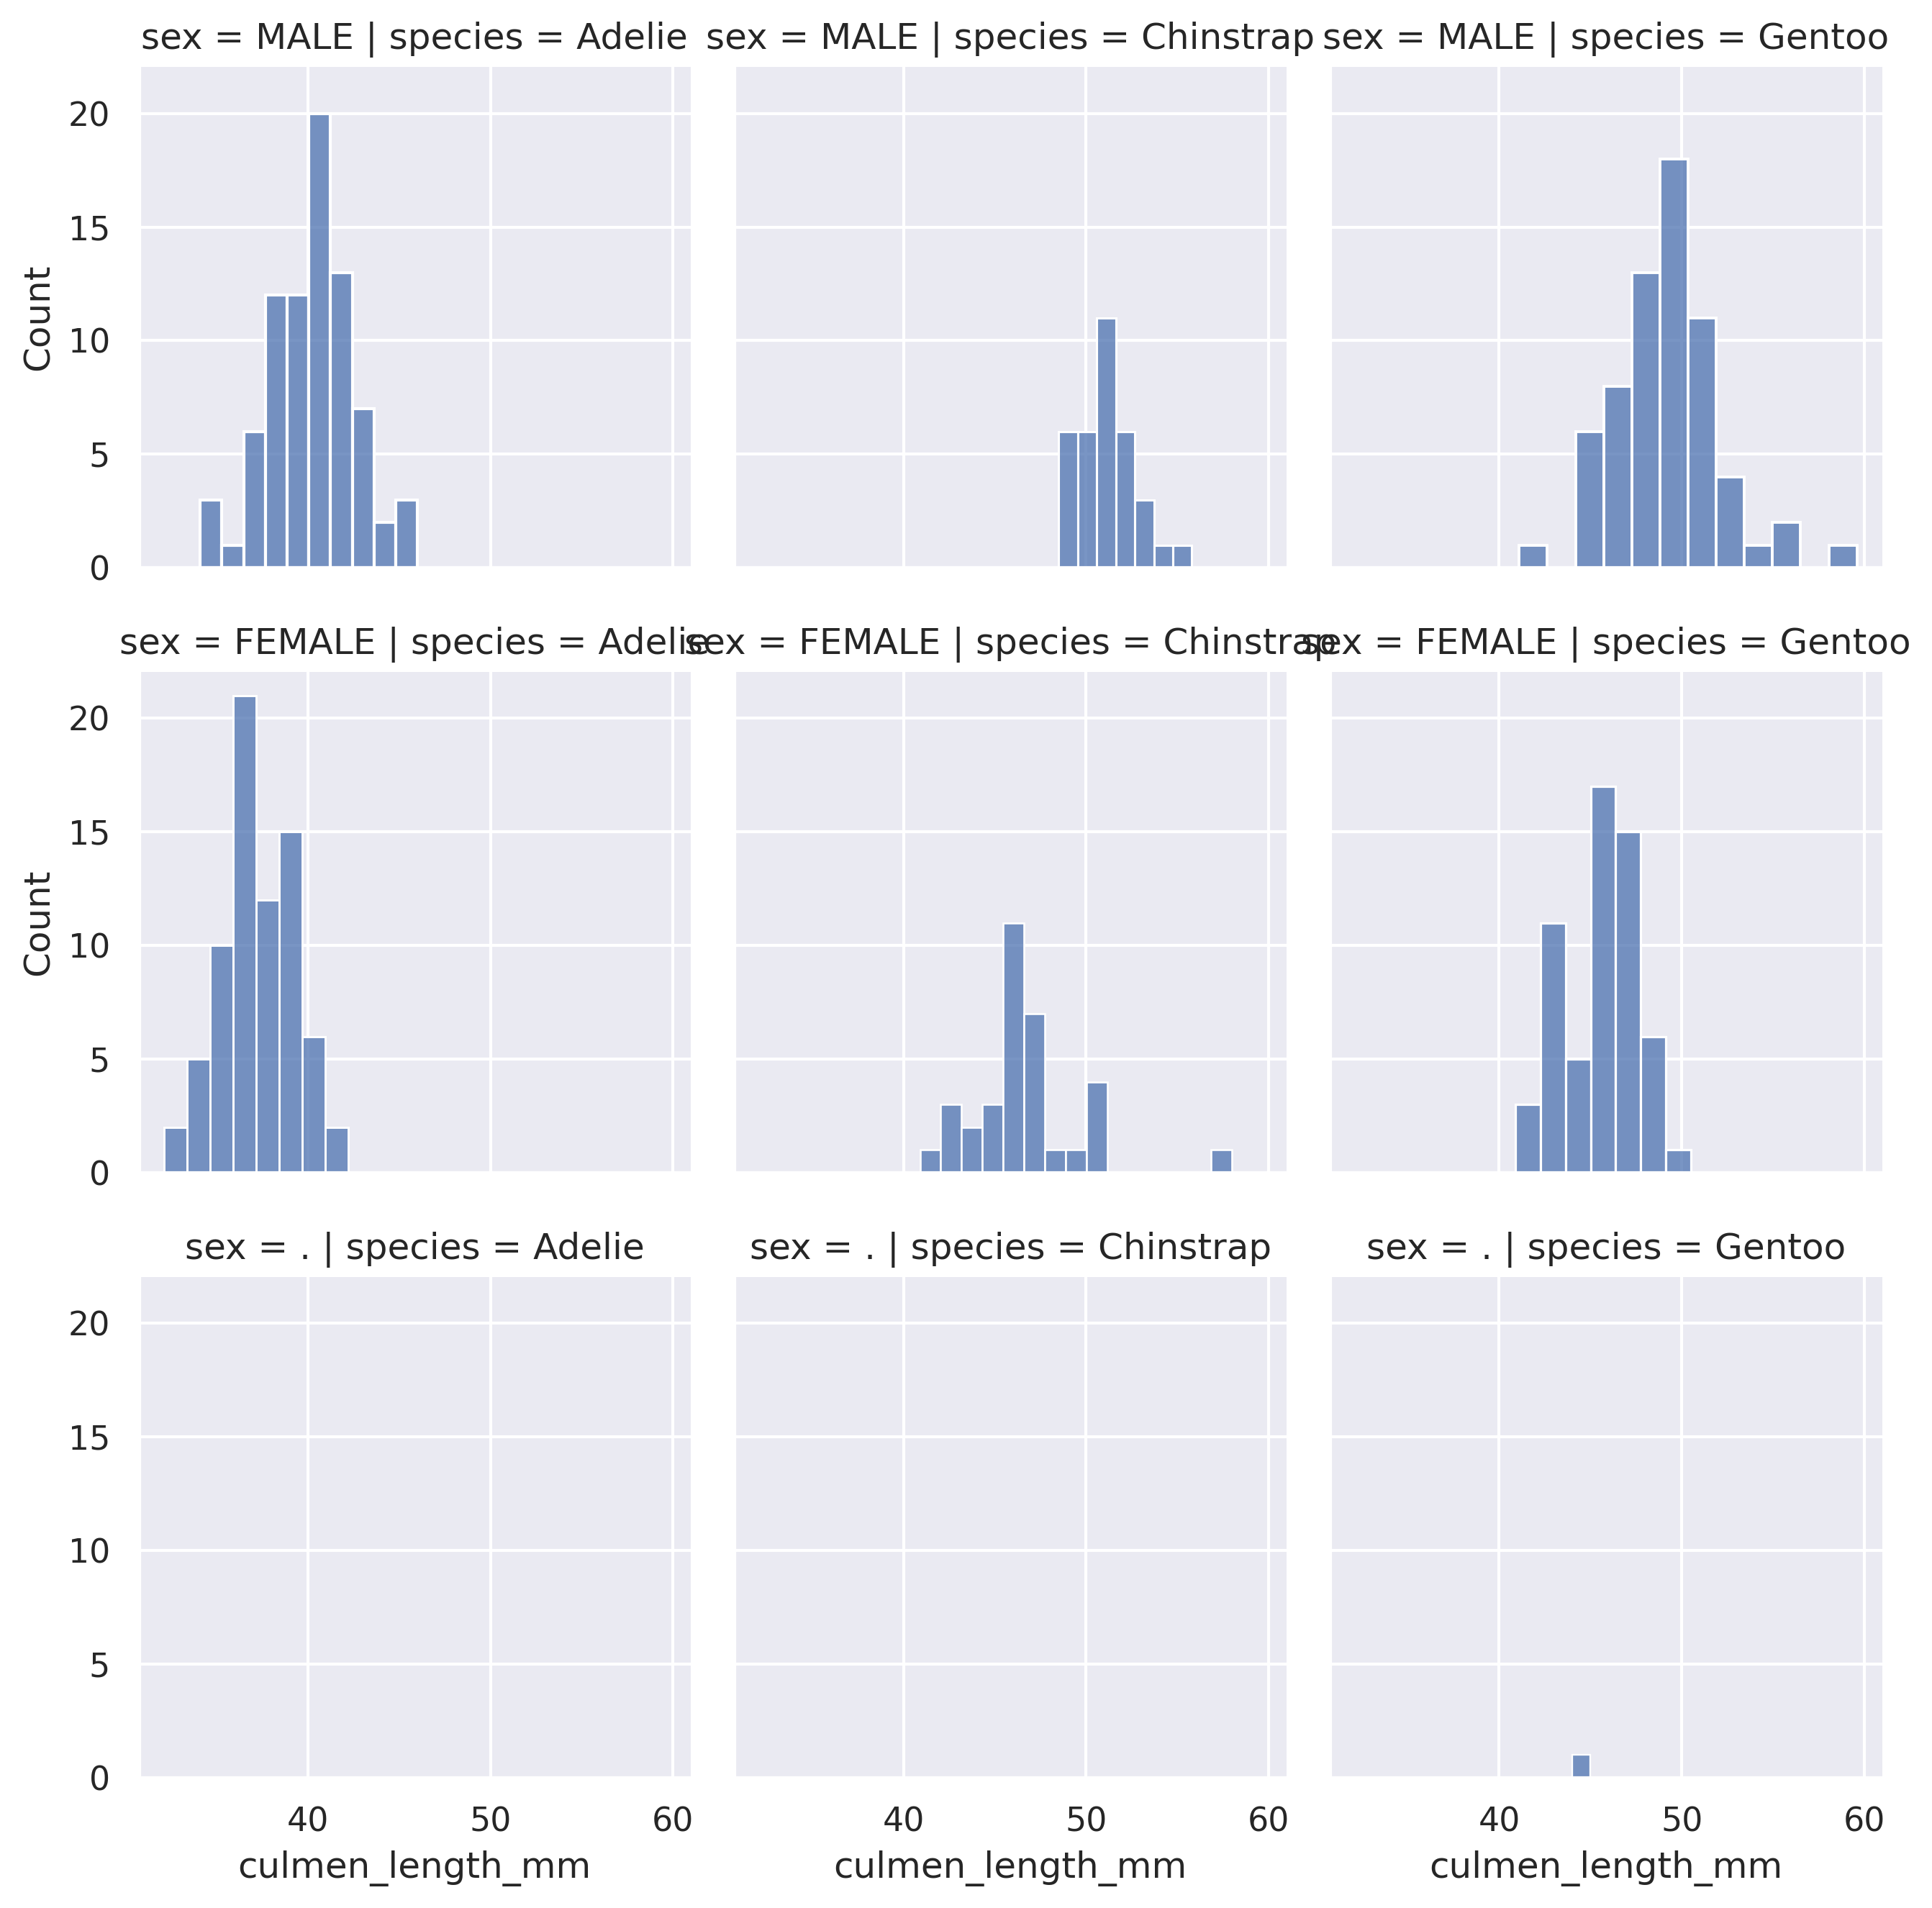

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

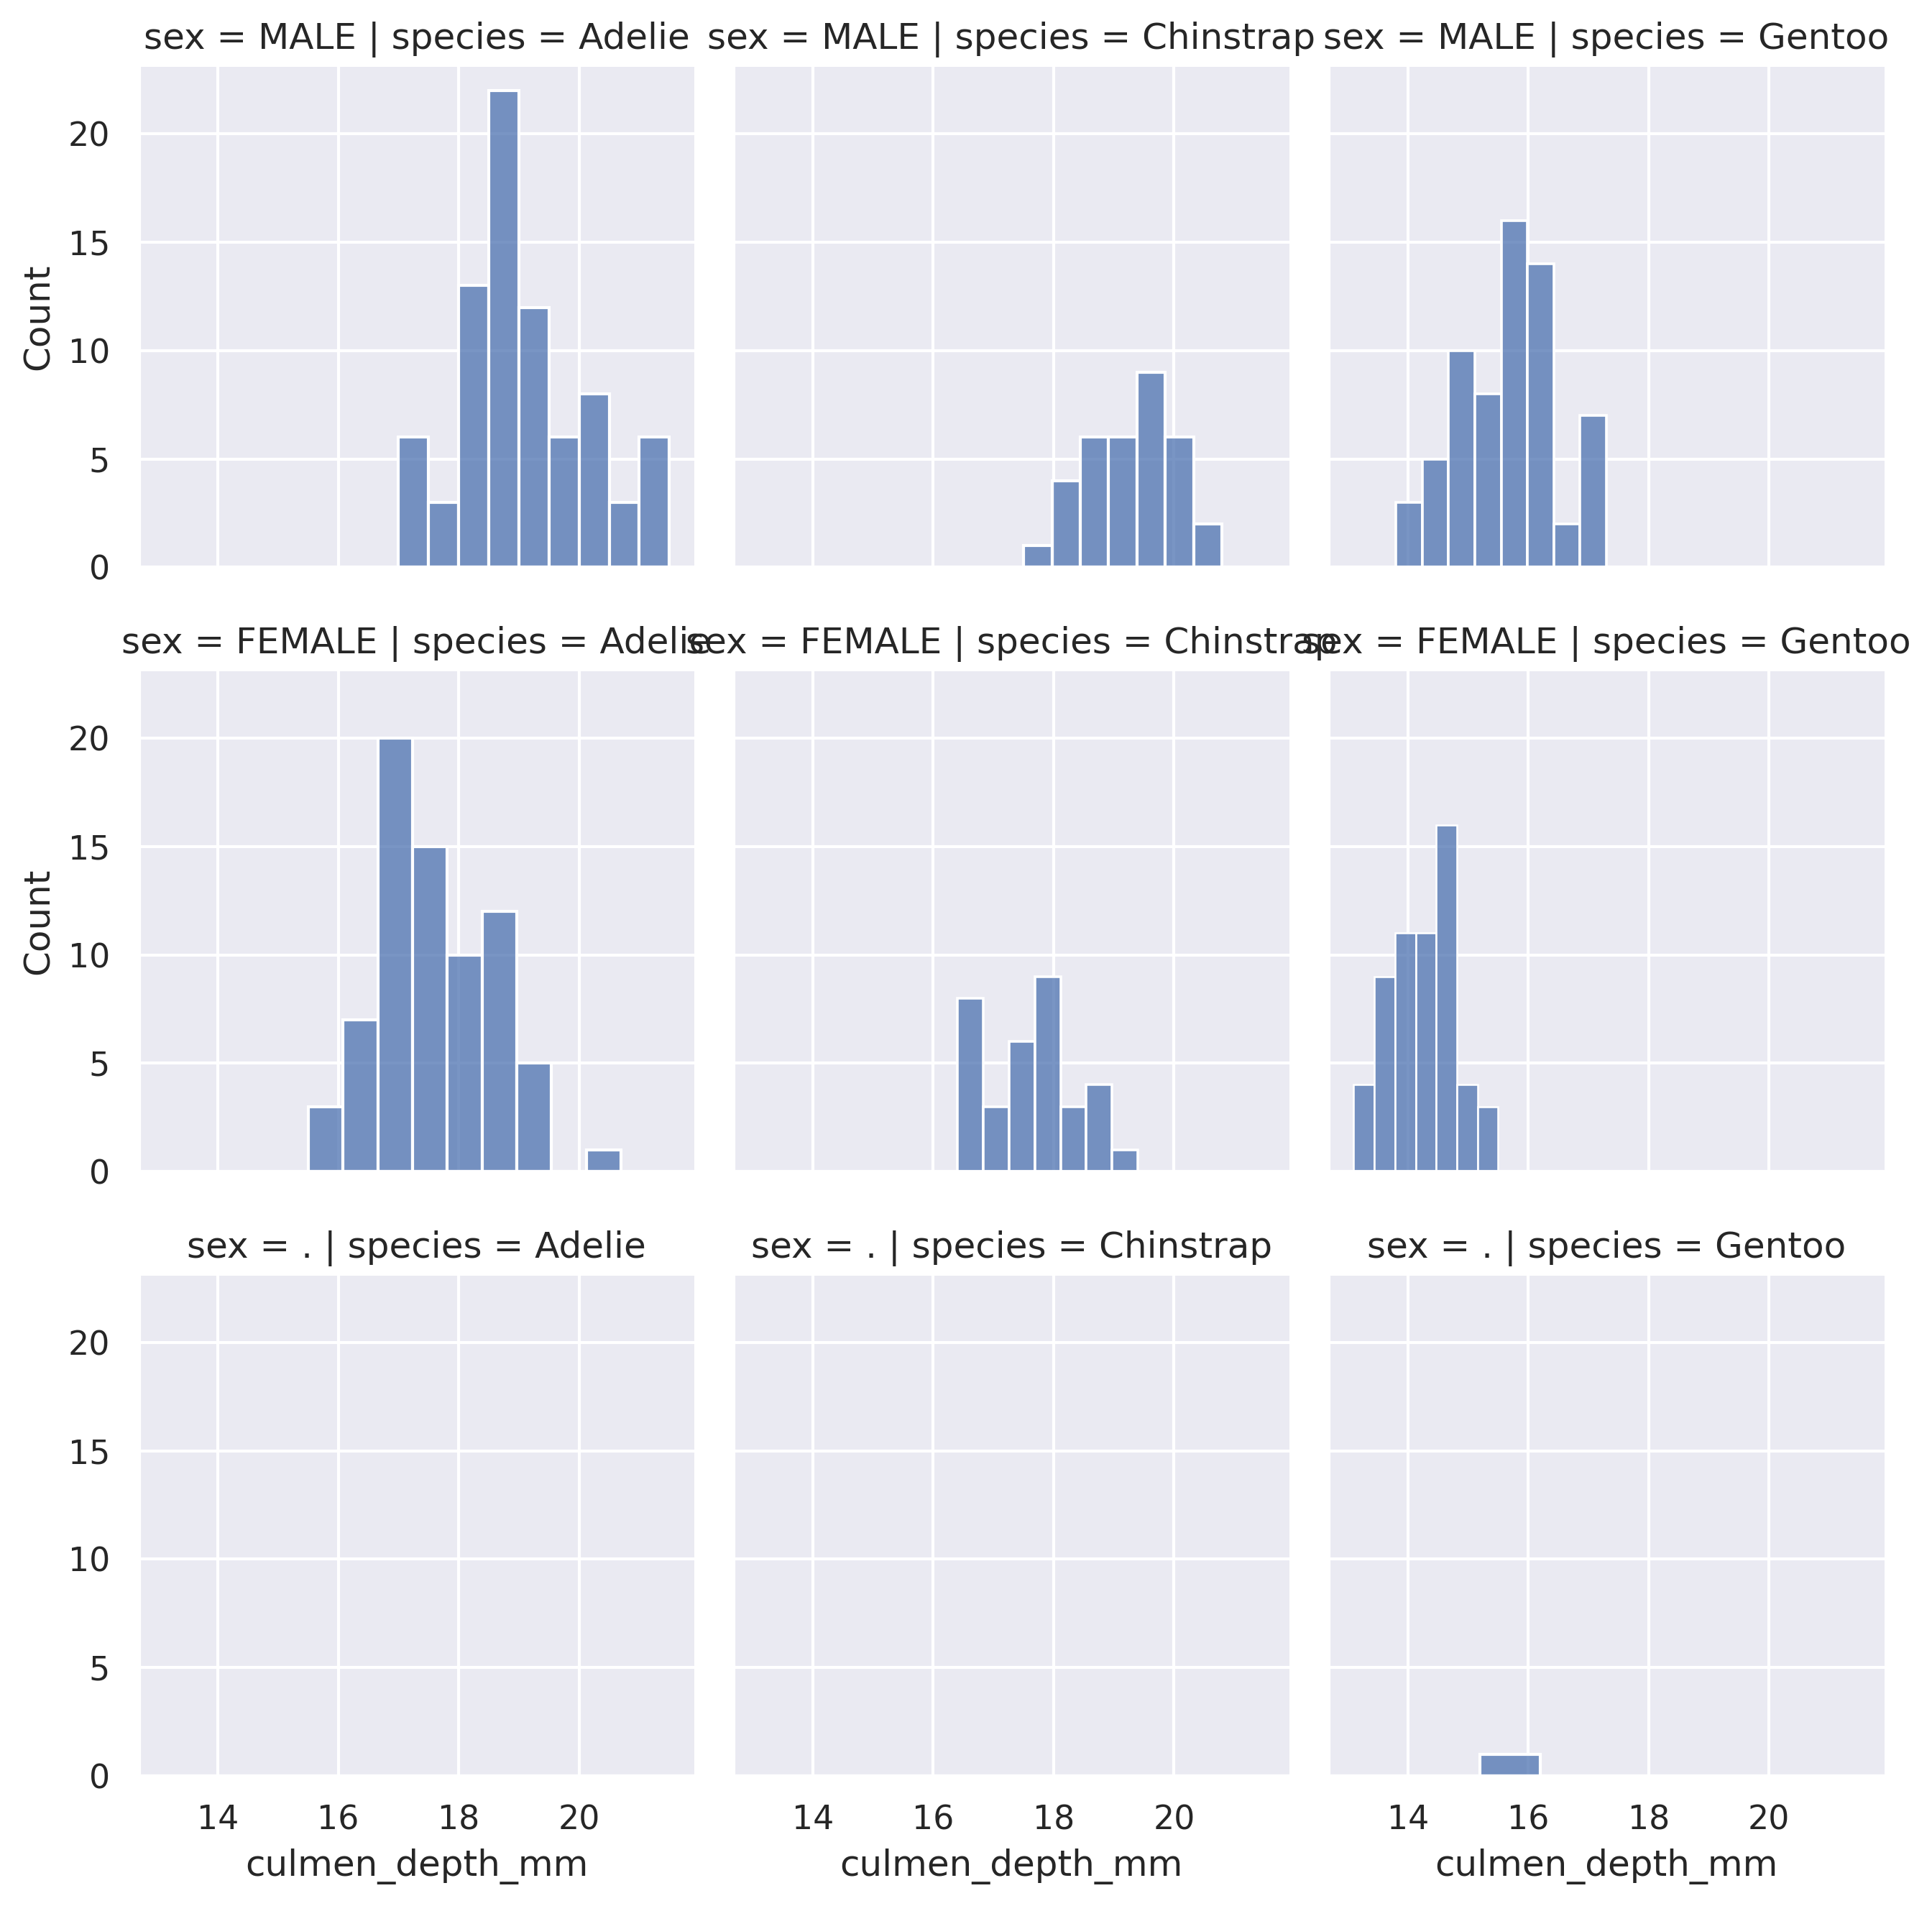

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

clustering the dataset

In [23]:

df = df.copy()

Which island consists of most Penguins?
Answer: Biscoe


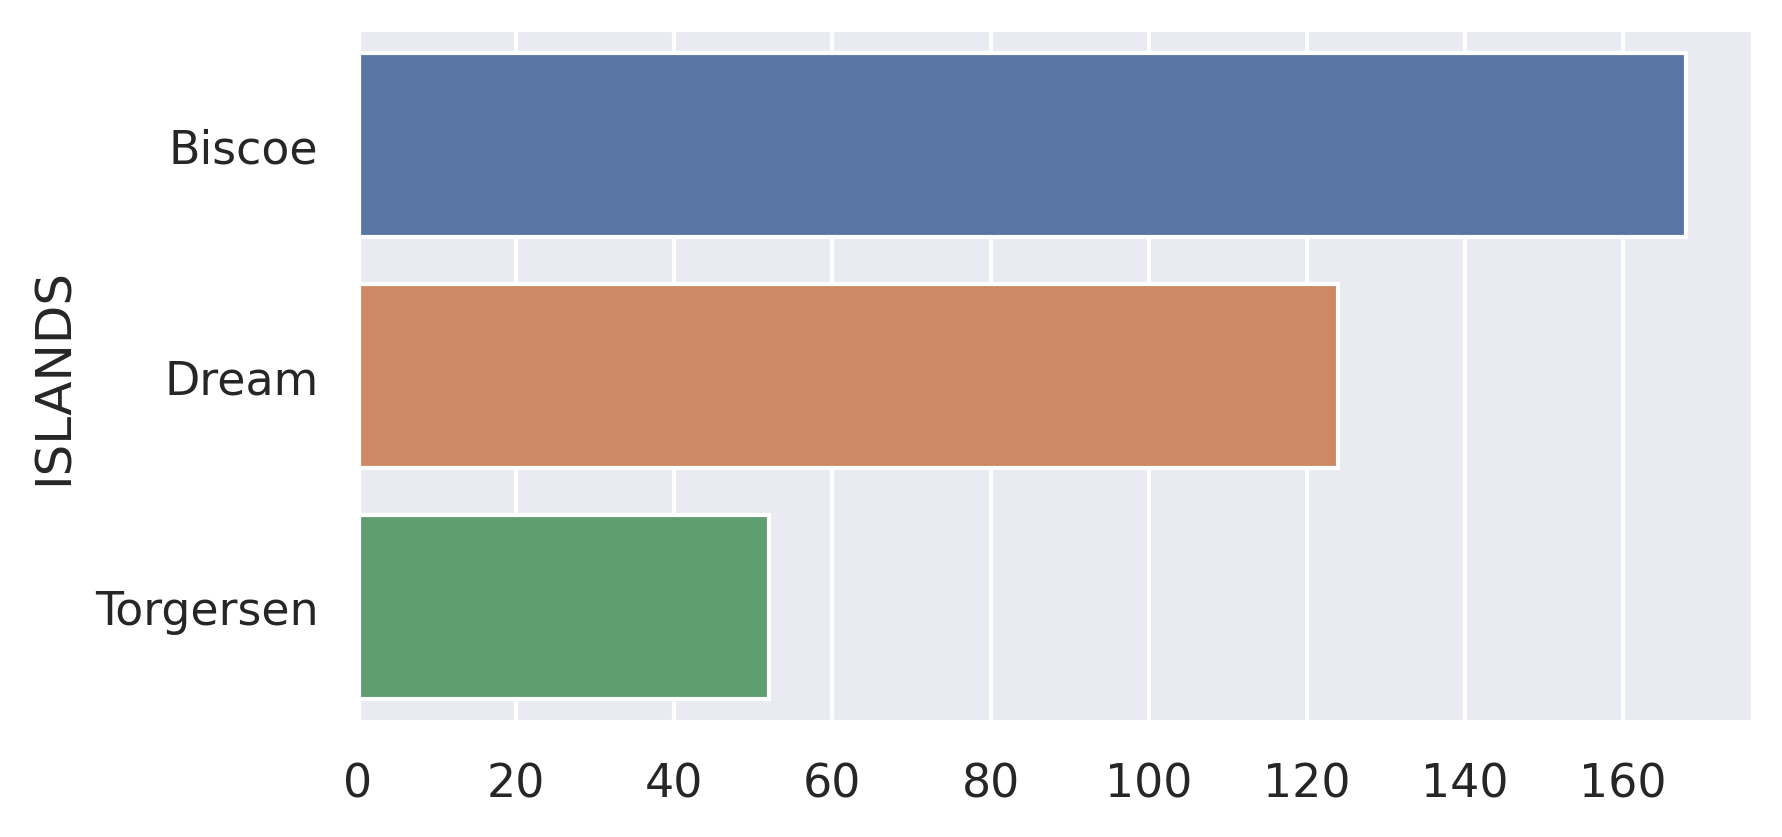

In [25]:
print('Which island consists of most Penguins?')
print('Answer: Biscoe')
df = df['island'].value_counts().reset_index()

fig = sns.barplot(data=df, x='island', y='index')
fig.set(xlabel='', ylabel='ISLANDS')
plt.show()

In [43]:
df = df.copy()
target = 'sex'
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]


In [45]:
target_mapper = {'MALE':0, 'FEMALE':1}
def target_encode(val):
    return target_mapper[val]

df['sex'] = df['sex'].apply(target_encode)

In [46]:
#separating X and y

X = df.drop('sex', axis=1)
y = df['sex']

In [47]:

from sklearn import preprocessing
X = preprocessing.scale(X)

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [49]:
# model fitting and prediction

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [50]:
# checking performance of model

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[29  7]
 [ 1 32]]


In [51]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        36
           1       0.82      0.97      0.89        33

    accuracy                           0.88        69
   macro avg       0.89      0.89      0.88        69
weighted avg       0.90      0.88      0.88        69



ROC CURVE


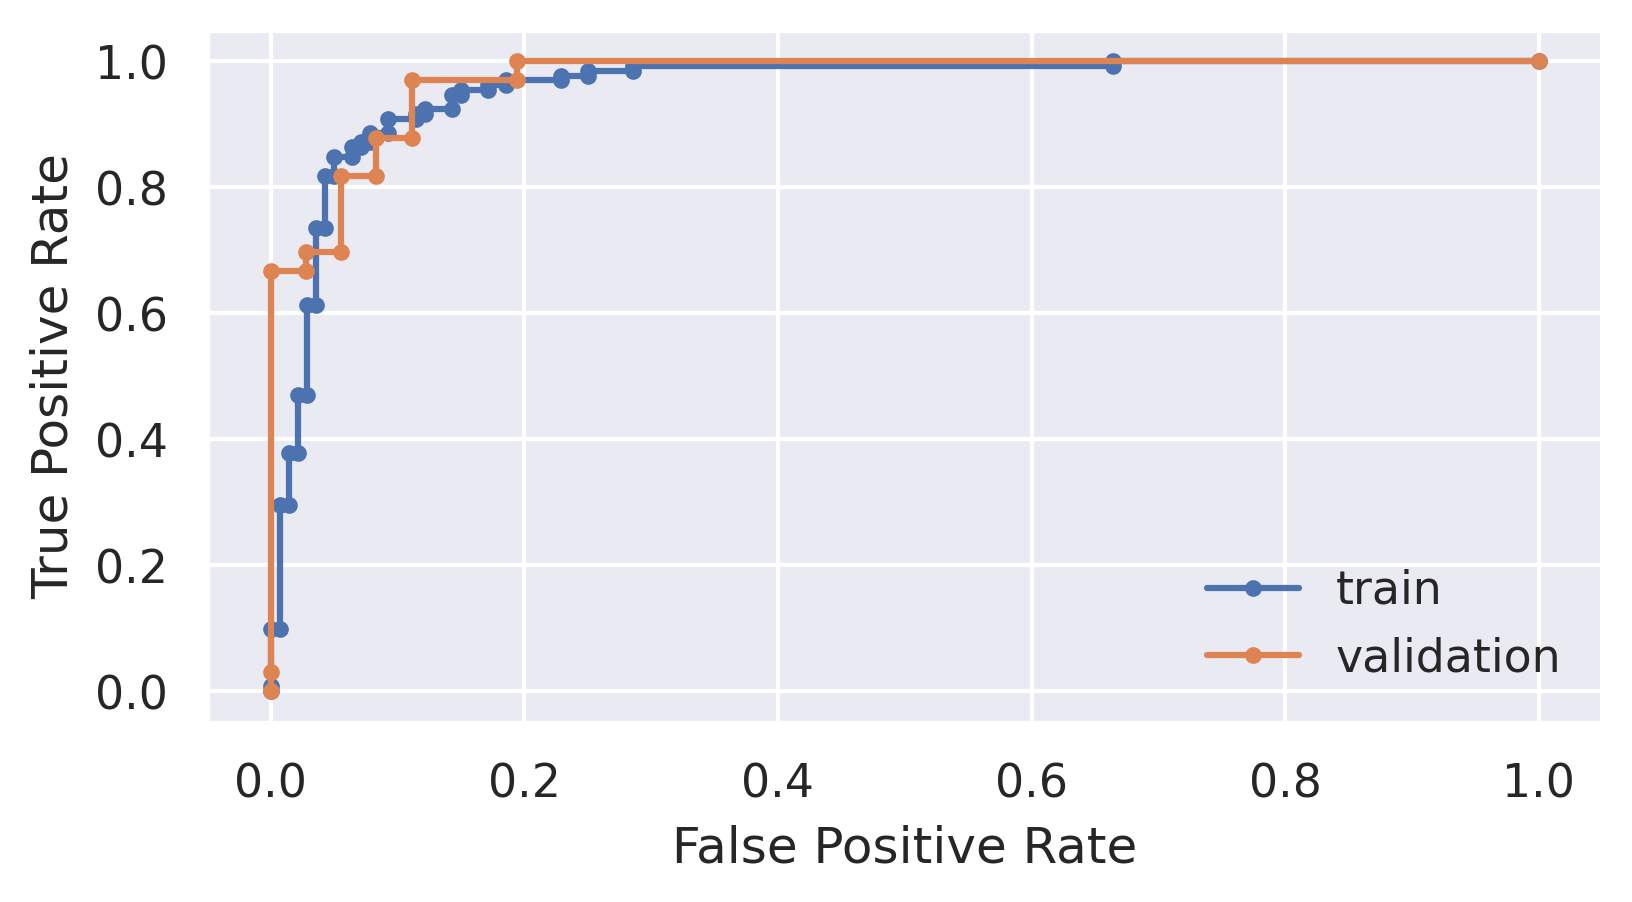

In [52]:
# ROC CURVE

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

So the model achieved an accuracy of 88%.¶

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot
!pip install joypy
import joypy
from sklearn.cluster import KMeans


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH


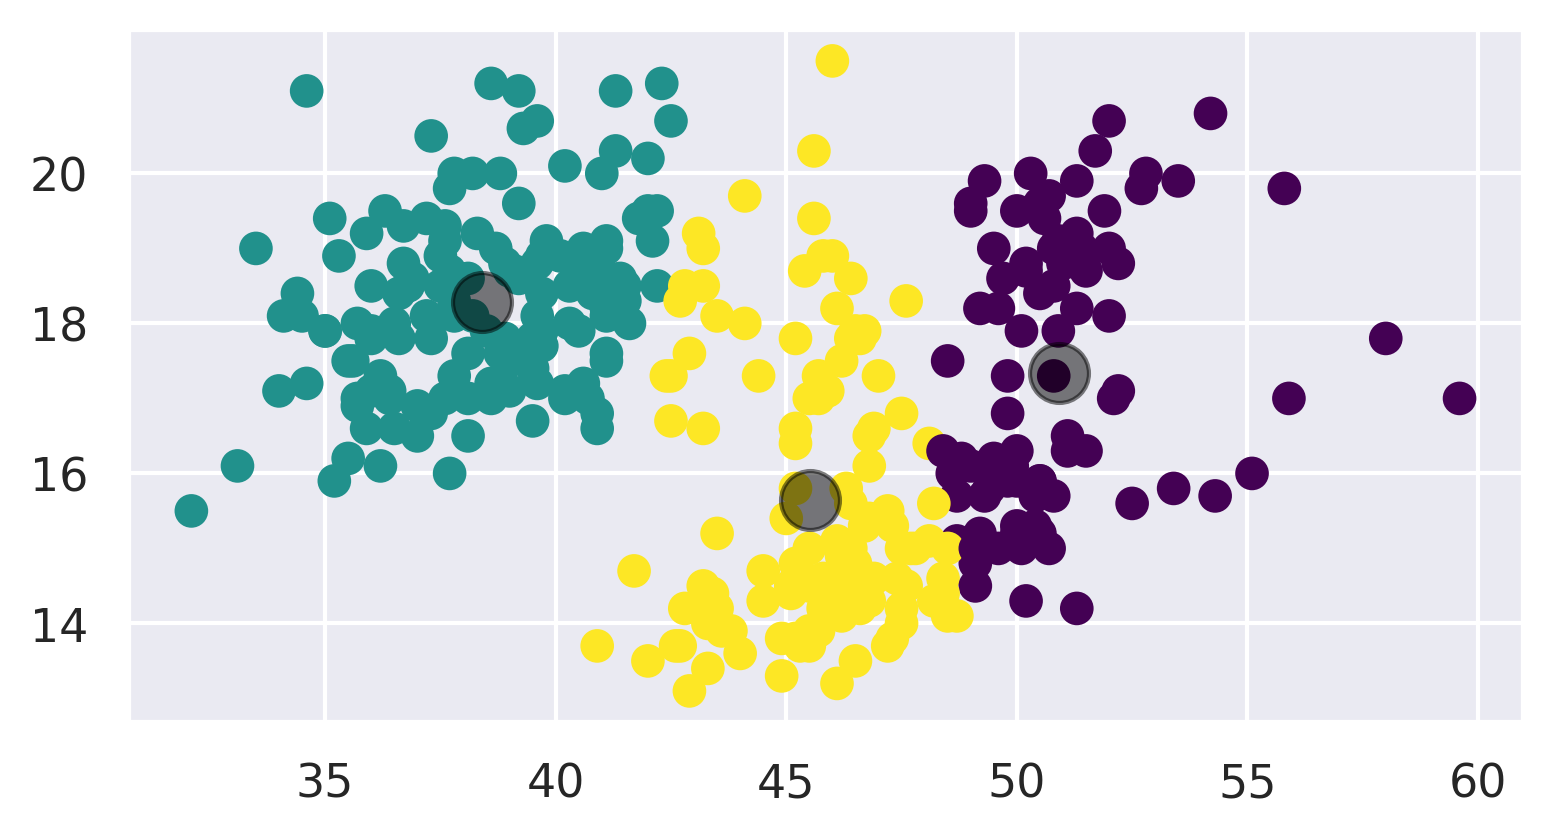

In [57]:
print('CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH')
X = df[['culmen_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()



CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH


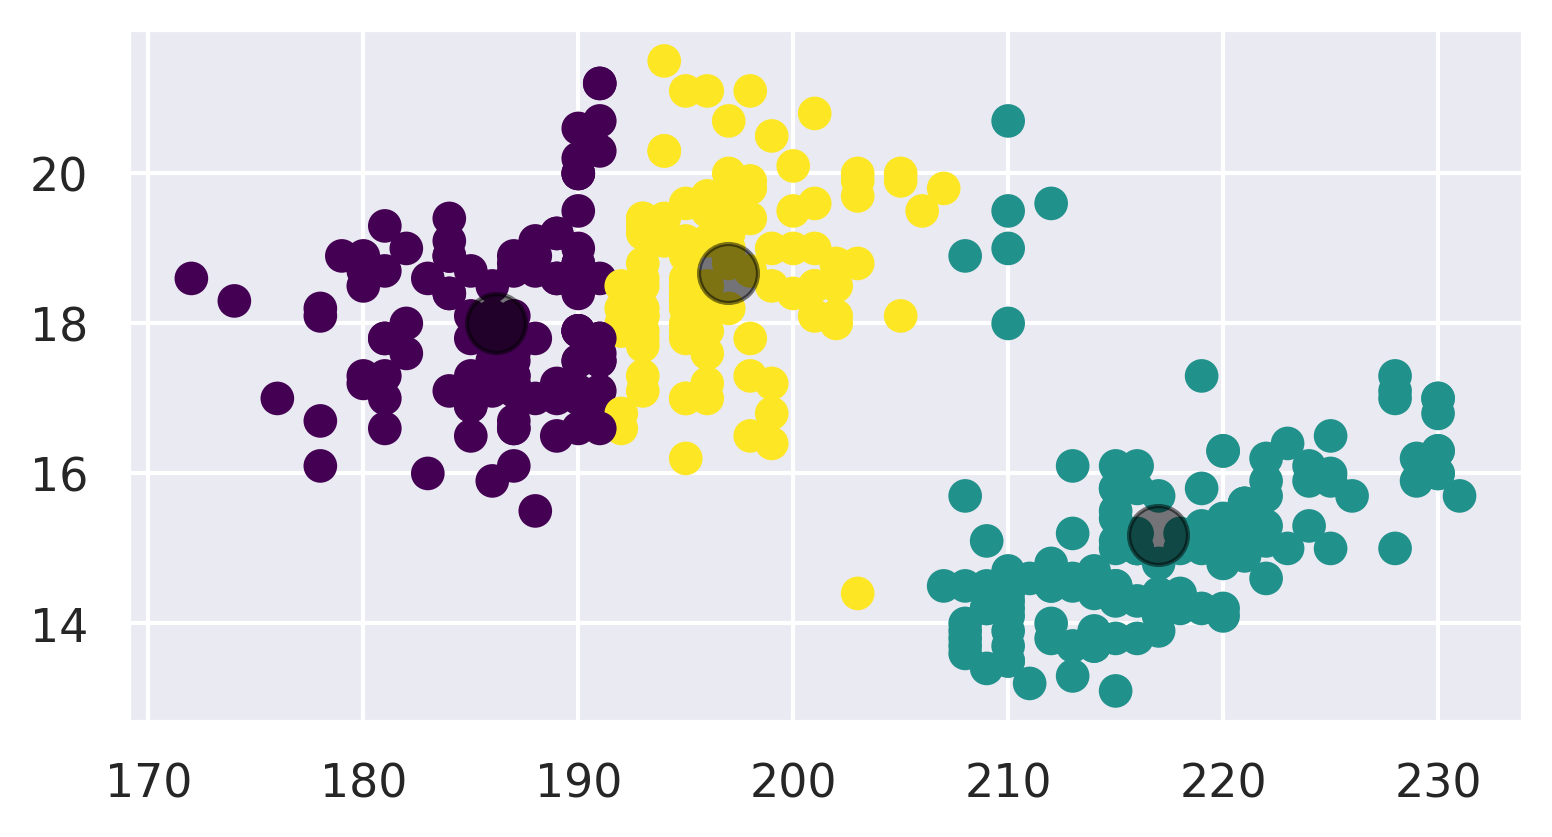

In [58]:
print('CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH')
X = df[['flipper_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND BODY MASS


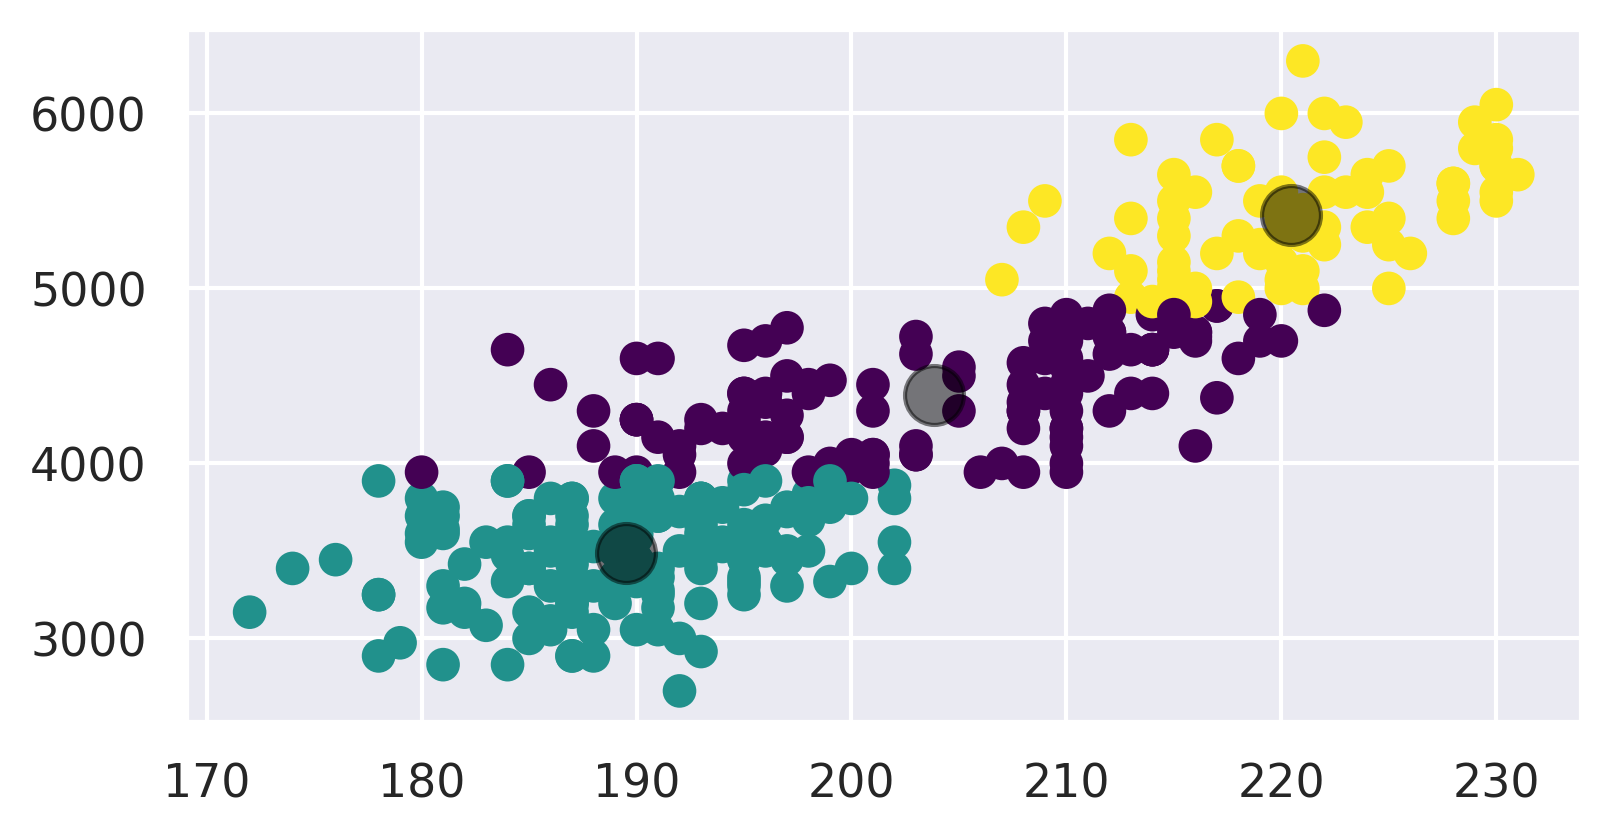

In [59]:
print('CLUSTERING ON FLIPPER LENGTH AND BODY MASS')
X = df[['flipper_length_mm','body_mass_g']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'body_mass_g'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()